### aim: Fig-means-extremes, Table-means-clim-and-trend Table-extremes-clim-and-trend

### associated scripts:

- means timeseries made in windEval/plottingCode/extract_ts.py  and extract_ts_2019.py which needs to be run in the pyxr env, which has a UKESM-compatible xarray
- trends calculated in windEval/plottingCode/trend_table.py

In [11]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [13]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

## Calculate seasonal mean climatology (for table)

these seasonal climatologies are calculated in Fig-spat-clim

In [19]:
sdir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'


merradjf = xr.open_dataset(f'{sdir}/MERRA_djf_1980-2019.nc')
merrajja = xr.open_dataset(f'{sdir}/MERRA_jja_1980-2019.nc')
merrason = xr.open_dataset(f'{sdir}/MERRA_son_1980-2019.nc')
merramam = xr.open_dataset(f'{sdir}/MERRA_mam_1980-2019.nc')
merrafy = xr.open_dataset(f'{sdir}/MERRA_fy_1980-2019.nc')

doedjf = xr.open_dataset(f'{sdir}/NCEP-DOE_djf_1980-2019.nc')
doejja = xr.open_dataset(f'{sdir}/NCEP-DOE_jja_1980-2019.nc')
doeson = xr.open_dataset(f'{sdir}/NCEP-DOE_son_1980-2019.nc')
doemam = xr.open_dataset(f'{sdir}/NCEP-DOE_mam_1980-2019.nc')
doefy = xr.open_dataset(f'{sdir}/NCEP-DOE_fy_1980-2019.nc')

ncardjf = xr.open_dataset(f'{sdir}/NCEP-NCAR_djf_1980-2019.nc')
ncarjja = xr.open_dataset(f'{sdir}/NCEP-NCAR_jja_1980-2019.nc')
ncarson = xr.open_dataset(f'{sdir}/NCEP-NCAR_son_1980-2019.nc')
ncarmam = xr.open_dataset(f'{sdir}/NCEP-NCAR_mam_1980-2019.nc')
ncarfy = xr.open_dataset(f'{sdir}/NCEP-NCAR_fy_1980-2019.nc')

eradjf = xr.open_dataset(f'{sdir}/ERA5_djf_1980-2019.nc')
erajja = xr.open_dataset(f'{sdir}/ERA5_jja_1980-2019.nc')
erason = xr.open_dataset(f'{sdir}/ERA5_son_1980-2019.nc')
eramam = xr.open_dataset(f'{sdir}/ERA5_mam_1980-2019.nc')
erafy = xr.open_dataset(f'{sdir}/ERA5_fy_1980-2019.nc')

ukesmdjf = xr.open_dataset(f'{sdir}/UKESM_djf_1980-2019.nc')
ukesmjja = xr.open_dataset(f'{sdir}/UKESM_jja_1980-2019.nc')
ukesmson = xr.open_dataset(f'{sdir}/UKESM_son_1980-2019.nc')
ukesmmam = xr.open_dataset(f'{sdir}/UKESM_mam_1980-2019.nc')
ukesmfy = xr.open_dataset(f'{sdir}/UKESM_fy_1980-2019.nc')

In [20]:
savenam = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
cdomask = xr.open_dataset(savenam)
cdomask
tmask = cdomask.tmask
sh = False
if sh:
    plt.figure()
    plt.pcolormesh(tmask)
    plt.figure()
    plt.pcolormesh(erafyws)

In [21]:
ex = True
if ex:
    data = np.zeros([5,5])
    
    data[0,0] = (np.average(erafy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,0] = (np.average(eradjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,0] = (np.average(eramam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,0] = (np.average(erajja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,0] = (np.average(erason.wspd10m[30:50,:], weights=tmask[30:50,:]))
    
    data[0,1] = (np.average(ncarfy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,1] = (np.average(ncardjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,1] = (np.average(ncarmam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,1] = (np.average(ncarjja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,1] = (np.average(ncarson.wspd10m[30:50,:], weights=tmask[30:50,:]))

    data[0,2] = (np.average(merrafy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,2] = (np.average(merradjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,2] = (np.average(merramam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,2] = (np.average(merrajja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,2] = (np.average(merrason.wspd10m[30:50,:], weights=tmask[30:50,:]))

    data[0,3] = (np.average(doefy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,3] = (np.average(doedjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,3] = (np.average(doemam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,3] = (np.average(doejja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,3] = (np.average(doeson.wspd10m[30:50,:], weights=tmask[30:50,:]))

    data[0,4] = (np.average(ukesmfy.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[1,4] = (np.average(ukesmdjf.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[2,4] = (np.average(ukesmmam.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[3,4] = (np.average(ukesmjja.wspd10m[30:50,:], weights=tmask[30:50,:]))
    data[4,4] = (np.average(ukesmson.wspd10m[30:50,:], weights=tmask[30:50,:]))    

    #n = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']

    df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')

## This code calculates mean of all winds above 95%

The extreme winds are calculated as follows:
For each day in a year, the 95% of all winds below 30S is calculated and a weighted average is taken of winds above this percentile. For a seasonal extreme winds for a given year, the mean of this timeseries is taken. 



In [22]:
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    """ Very close to numpy.percentile, but supports weights.
    NOTE: quantiles should be in [0, 1]!
    :param values: numpy.array with data
    :param quantiles: array-like with many quantiles needed
    :param sample_weight: array-like of the same length as `array`
    :param values_sorted: bool, if True, then will avoid sorting of
        initial array
    :param old_style: if True, will correct output to be consistent
        with numpy.percentile.
    :return: numpy.array with computed quantiles.
    """
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [23]:

ex = False

def get_extrema(tvar,yr):
    tn = '/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_regridrecalc.nc'
    cdomask = xr.open_dataset(tn)
    adir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/'    
    w = xr.open_dataset(f'{adir}/{tvar}/{tvar}_wind_daily_1x1_{yr}.nc')

    at95 = np.zeros([len(w.time_counter)])
    above95 = np.zeros([len(w.time_counter)])
    above95wt = np.zeros([len(w.time_counter)])
    tmask = cdomask.tmask[30:50,:].values

    for i in range(0,len(w.time_counter)):

        twspd = w.wspd10m[i,30:50,:]
        where0 = np.where(tmask == 0)
        twspd2 = np.copy(twspd)
        twspd2[np.where(tmask == 0)] = np.nan
        perc95 = weighted_quantile(np.ravel(twspd), 0.95, \
                                sample_weight=np.ravel(tmask))

        tmask2 = np.copy(tmask)
        ts = twspd2[twspd2>perc95]
        q = np.where(twspd2 < perc95)
        tmask2[q] = 0

        at95[i] = perc95
        above95wt[i] = np.average(np.ravel(twspd), weights = np.ravel(tmask2))
        above95[i] = np.nanmean(twspd2[twspd2>perc95])

    savenam = f'{adir}/intProc/{tvar}_windex_{yr}.nc'
    print(savenam)
    data_vars = {'at95':(['time_counter'], at95,
    {'units': 'm/s',
    'long_name':'daily 95% of winds south of 40S to 60s'}),
                 'above95':(['time_counter'], above95,
    {'units': '',
    'long_name':''}),
                 'above95wt':(['time_counter'], above95wt,
    {'units': '',
    'long_name':'mean of everything above 95wt'}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], w.time_counter),
            }
    # define global attributes
    attrs = {'made in':'windEval/plottingCode/Fig-means-extremes.ipynb',
    'desc': ''
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)

tits = ['MERRA','NCEP-DOE']#,'ERA5','NCEP-NCAR','UKESM']

if ex:

    for yr in range(1940,2024):
        for t in tits:
            try:
                get_extrema(t,yr)
            except:
                print(f'haha no for {t}, {yr}')

            


## claculate esasonal extreme climatology (for table)

In [24]:
def make_exlist(prod,yrst = 1980, yrend = 2019, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}_windex_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



In [27]:
MERRAex = xr.open_mfdataset(make_exlist('MERRA'))
ERA5ex = xr.open_mfdataset(make_exlist('ERA5'))
NCEPDOEex = xr.open_mfdataset(make_exlist('NCEP-DOE'))
NCEPNCARex = xr.open_mfdataset(make_exlist('NCEP-NCAR'))
UKESMex = xr.open_mfdataset(make_exlist('UKESM'))

tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex]

UKESMex_FY = (UKESMex.above95wt.mean(dim = ['time_counter']).values)
UKESMex_DJF = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
UKESMex_MAM = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
UKESMex_JJA = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
UKESMex_SON = (UKESMex.above95wt.sel(time_counter=(UKESMex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

ERA5ex_FY = (ERA5ex.above95wt.mean(dim = ['time_counter']).values)
ERA5ex_DJF = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
ERA5ex_MAM = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
ERA5ex_JJA = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
ERA5ex_SON = (ERA5ex.above95wt.sel(time_counter=(ERA5ex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

NCEPDOEex_FY = (NCEPDOEex.above95wt.mean(dim = ['time_counter']).values)
NCEPDOEex_DJF = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
NCEPDOEex_MAM = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
NCEPDOEex_JJA = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
NCEPDOEex_SON = (NCEPDOEex.above95wt.sel(time_counter=(NCEPDOEex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

NCEPNCARex_FY = (NCEPNCARex.above95wt.mean(dim = ['time_counter']).values)
NCEPNCARex_DJF = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
NCEPNCARex_MAM = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
NCEPNCARex_JJA = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
NCEPNCARex_SON = (NCEPNCARex.above95wt.sel(time_counter=(NCEPNCARex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

MERRAex_FY = (MERRAex.above95wt.mean(dim = ['time_counter']).values)
MERRAex_DJF = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'DJF')).mean(dim = ['time_counter']).values)
MERRAex_MAM = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'MAM')).mean(dim = ['time_counter']).values)
MERRAex_JJA = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'JJA')).mean(dim = ['time_counter']).values)
MERRAex_SON = (MERRAex.above95wt.sel(time_counter=(MERRAex['time_counter.season'] == 'SON')).mean(dim = ['time_counter']).values)

In [28]:
ex = True
if ex:
    data = np.zeros([5,5])
    
    data[0,0] = ERA5ex_FY
    data[1,0] = ERA5ex_DJF
    data[2,0] = ERA5ex_MAM
    data[3,0] = ERA5ex_JJA
    data[4,0] = ERA5ex_SON
    
    data[0,1] = NCEPNCARex_FY
    data[1,1] = NCEPNCARex_DJF
    data[2,1] = NCEPNCARex_MAM
    data[3,1] = NCEPNCARex_JJA
    data[4,1] = NCEPNCARex_SON

    data[0,2] = MERRAex_FY
    data[1,2] = MERRAex_DJF
    data[2,2] = MERRAex_MAM
    data[3,2] = MERRAex_JJA
    data[4,2] = MERRAex_SON

    data[0,3] = NCEPDOEex_FY
    data[1,3] = NCEPDOEex_DJF
    data[2,3] = NCEPDOEex_MAM
    data[3,3] = NCEPDOEex_JJA
    data[4,3] = NCEPDOEex_SON

    data[0,4] = UKESMex_FY
    data[1,4] = UKESMex_DJF
    data[2,4] = UKESMex_MAM
    data[3,4] = UKESMex_JJA
    data[4,4] = UKESMex_SON 

    #n = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']

    df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                      index  = ['full year','DJF','MAM', 'JJA', 'SON',])
    df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
    df.to_csv(f'./plts/allmod_weightabove95ex_windspeed_1980-2019_60-40S.csv')

## print out the tables of means and extremes

In [29]:
w = pd.read_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')
print(w)
print()
w = pd.read_csv(f'./plts/allmod_weightabove95ex_windspeed_1980-2019_60-40S.csv')
print(w)

  Unnamed: 0      ERA5  NCEP-NCAR     MERRA   NCEP-DOE     UKESM
0  full year  9.051943   9.002299  8.797896  10.359714  9.360448
1        DJF  8.409101   8.373870  8.146661   9.617426  8.743100
2        MAM  9.127803   9.106901  8.825818  10.467496  9.479588
3        JJA  9.500867   9.424096  9.296988  10.860016  9.706106
4        SON  9.158935   9.093366  8.910957  10.481119  9.513000

  Unnamed: 0       ERA5  NCEP-NCAR      MERRA   NCEP-DOE      UKESM
0  full year  15.608290  15.468449  15.261471  18.546175  15.941365
1        DJF  14.748195  14.567467  14.294108  17.410640  15.011784
2        MAM  15.759609  15.653359  15.342449  18.747951  16.056631
3        JJA  16.232183  16.108885  16.042890  19.379755  16.619869
4        SON  15.677566  15.527590  15.348986  18.625617  16.077177


In [30]:
def make_exlist(prod,yrst = 1980, yrend = 2020, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}_windex_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

MERRAex = xr.open_mfdataset(make_exlist('MERRA'))
ERA5ex = xr.open_mfdataset(make_exlist('ERA5'))
NCEPDOEex = xr.open_mfdataset(make_exlist('NCEP-DOE'))
NCEPNCARex = xr.open_mfdataset(make_exlist('NCEP-NCAR'))
UKESMex = xr.open_mfdataset(make_exlist('UKESM'))

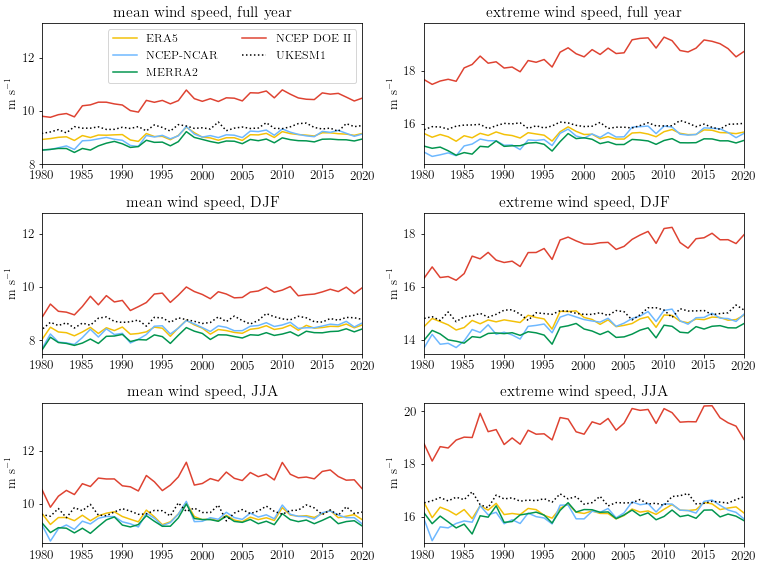

In [31]:
import coldic as cd
reload(cd)

ncar_ts = xr.open_dataset(f'{sdir}NCEP-NCAR_40-60S_mean_wspd_ts.nc')
doe_ts = xr.open_dataset(f'{sdir}NCEP-DOE_40-60S_mean_wspd_ts.nc')
ukesm_ts = xr.open_dataset(f'{sdir}UKESM_40-60S_mean_wspd_ts.nc')
era_ts = xr.open_dataset(f'{sdir}ERA5_40-60S_mean_wspd_ts.nc')
merra_ts = xr.open_dataset(f'{sdir}MERRA_40-60S_mean_wspd_ts.nc')


tn = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']
tnt = ['ERA5','NCEP-NCAR','MERRA-2','NCEP-DOE II','UKESM1']
tdar = [era_ts, ncar_ts, merra_ts, doe_ts,  ukesm_ts]
tdarx = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex, UKESMex]

fact = 0.9
fig, axs = plt.subplots(3,2, figsize=(12*fact, 9*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i in range(0,5):
    
    xmi = 8; mar = 5.3
    td = tdar[i]
    a = td.groupby('time_counter.year').mean()
    axs[0].plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'])
    axs[0].set_ylim([xmi,xmi+mar])
    
    xmi = 7.5
    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    axs[2].plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'])
    axs[2].set_ylim([xmi,xmi+mar])

    xmi = 8.5
    a = td.sel(time_counter=(td['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    axs[4].plot(a.year,a.wspd10m, color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'])
    axs[4].set_ylim([xmi,xmi+mar])
    
    
for i in range(0,6):
    axs[i].set_xlim([1980,2020])
    axs[0].legend(ncol = 3, fontsize = 10, loc = 'best')
    
    
for i in range(0,5):
    
    xmi = 14.5; 
    td = tdarx[i]
    a = td.groupby('time_counter.year').mean()
    axs[1].plot(a.year,a.above95wt, color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'])
    axs[1].set_ylim([xmi,xmi+mar])
    
    xmi = 13.5;
    a = td.sel(time_counter=(td['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    axs[3].plot(a.year,a.above95wt, color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'])
    axs[3].set_ylim([xmi,xmi+mar])

    xmi = 15;
    a = td.sel(time_counter=(td['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    axs[5].plot(a.year,a.above95wt, color = cd.prod[tn[i]]['col'], \
                label = cd.prod[tn[i]]['fnam'], linestyle = cd.prod[tn[i]]['linestyle'])
    axs[5].set_ylim([xmi,xmi+mar])
    
tits = ['mean wind speed, full year', 'extreme wind speed, full year',\
        'mean wind speed, DJF', 'extreme wind speed, DJF',
        'mean wind speed, JJA', 'extreme wind speed, JJA',]
for i in range(0,6):
    axs[i].set_xlim([1980,2020])
    axs[0].legend(ncol = 2, fontsize = 12, loc = 'best')
    axs[i].set_ylabel('m s$^{-1}$')
    axs[i].set_title(tits[i])
    
plt.tight_layout()

fig.savefig('./plts/Fig-mean-extreme.jpg', dpi = 300, bbox_inches='tight')

## trend function

In [32]:

import pymannkendall as mk
from scipy import stats

def give_trends(ts_y):

    ts_x = np.arange(0,len(ts_y))
    trend, h, mk_p, z, Tau, s, var_s, mk_slope, intercept = mk.original_test(ts_y)
    lin_slope, intercept, r_value, lin_p, std_err = stats.linregress(ts_x,ts_y)
    
    return mk_slope, mk_p, lin_slope, lin_p


## Calculate trends in means (for table)

get timeseries out plottingCode/extract_ts_2019.py

In [33]:
merra_ts = xr.open_dataset(f'{sdir}/MERRA_40-60S_mean_wspd_ts_1980-2019.nc')
era_ts = xr.open_dataset(f'{sdir}/ERA5_40-60S_mean_wspd_ts_1980-2019.nc')
doe_ts = xr.open_dataset(f'{sdir}/NCEP-DOE_40-60S_mean_wspd_ts_1980-2019.nc')
ncar_ts = xr.open_dataset(f'{sdir}/NCEP-NCAR_40-60S_mean_wspd_ts_1980-2019.nc')
ukesm_ts = xr.open_dataset(f'{sdir}/UKESM_40-60S_mean_wspd_ts_1980-2019.nc')

In [35]:
dss = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']
tdar = [era_ts, ncar_ts, merra_ts, doe_ts,  ukesm_ts]

data = np.zeros([5,5])
sig = np.zeros([5,5])
for i in range(0,5):
    print(dss[i])
    ds = dss[i]
    
    tdat = tdar[i]
    td = tdat
    td = td.wspd10m.groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[0,i] = lin_slope* 10
    sig[0,i] = lin_p
    

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[1,i] = lin_slope* 10
    sig[1,i] = lin_p
    

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[2,i] = lin_slope* 10
    sig[2,i] = lin_p

    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[3,i] = lin_slope* 10
    sig[3,i] = lin_p
    
    td = tdat
    td = td.wspd10m.sel(time_counter=(td['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[4,i] = lin_slope * 10
    sig[4,i] = lin_p
    
        
    i = i+1
    

df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df2 = pd.DataFrame(sig, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])

df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
df.to_csv(f'./plts/mn_wspd_trend.csv')
df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
df2.to_csv(f'./plts/mn_wspd_trendsig.csv')

ERA5
NCEP-NCAR
MERRA
NCEP-DOE
UKESM


## Calculate trends in extremes (for table)

In [37]:
def make_exlist(prod,yrst = 1980, yrend = 2019, \
                 baseDir = '/gpfs/data/greenocean2/software/products/windsFromComponents/dailyStandard/intProc/'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}/{prod}_windex_{yrs[i]}.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist

MERRAex = xr.open_mfdataset(make_exlist('MERRA'))
ERA5ex = xr.open_mfdataset(make_exlist('ERA5'))
NCEPDOEex = xr.open_mfdataset(make_exlist('NCEP-DOE'))
NCEPNCARex = xr.open_mfdataset(make_exlist('NCEP-NCAR'))
UKESMex = xr.open_mfdataset(make_exlist('UKESM'))

In [39]:
dss = ['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM']
tdar = [ERA5ex, NCEPNCARex, MERRAex, NCEPDOEex,  UKESMex]

data = np.zeros([5,5])
sig = np.zeros([5,5])
for i in range(0,5):
    print(dss[i])
    ds = dss[i]
    
    tdat = tdar[i]
    td = tdat
    td = td.above95wt.groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[0,i] = lin_slope* 10
    sig[0,i] = lin_p
    

    td = tdat
    td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'DJF')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[1,i] = lin_slope* 10
    sig[1,i] = lin_p
    

    td = tdat
    td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'MAM')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[2,i] = lin_slope* 10
    sig[2,i] = lin_p

    td = tdat
    td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'JJA')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[3,i] = lin_slope* 10
    sig[3,i] = lin_p
    
    td = tdat
    td = td.above95wt.sel(time_counter=(td['time_counter.season'] == 'SON')).\
    groupby('time_counter.year').mean().values
    mk_slope, mk_p, lin_slope, lin_p = give_trends(td)
    data[4,i] = lin_slope * 10
    sig[4,i] = lin_p
    
        
    i = i+1
    

df = pd.DataFrame(data, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])
df2 = pd.DataFrame(sig, columns=['ERA5','NCEP-NCAR','MERRA','NCEP-DOE','UKESM'],\
                  index  = ['full year','DJF','MAM', 'JJA', 'SON',])

df.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
df.to_csv(f'./plts/ex_wspd_trend.csv')
df2.attrs = {"made in": 'plottingCode/Fig-means-extremes.ipynb'}
df2.to_csv(f'./plts/ex_wspd_trendsig.csv')

ERA5
NCEP-NCAR
MERRA
NCEP-DOE
UKESM


## ok, what tables did we make?

    df.to_csv(f'./plts/allmod_mn_windspeed_1980-2019_60-40S.csv')
    df.to_csv(f'./plts/allmod_weightabove95ex_windspeed_1980-2019_60-40S.csv')
    df.to_csv(f'./plts/mn_wspd_trend.csv')
    df2.to_csv(f'./plts/mn_wspd_trendsig.csv')
    df.to_csv(f'./plts/ex_wspd_trend.csv')
    df2.to_csv(f'./plts/ex_wspd_trendsig.csv')